In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [24]:
# Import the Pokemon dataset
indir = os.path.join('data', 'Pokemon.csv')
try:
    df = pd.read_csv(indir, index_col=0)
except:
    df = pd.read_csv(indir, index_col=0, encoding='latin-1')

# Print out it's dimensions
df.shape

(151, 12)

In [3]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [4]:
sns.lmplot?

(0, 141.95596011521178)

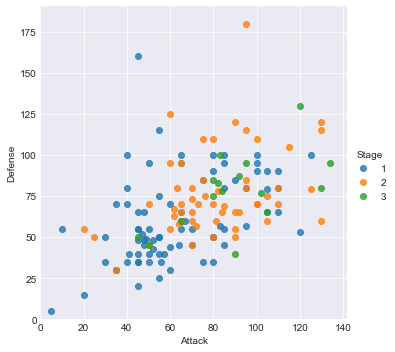

In [5]:
# Basic scatter plot in Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False,  # Disable regression; only scatter plot
           hue='Stage')  # Color points by Pokemon's stage
plt.ylim(0, None)
plt.xlim(0, None)

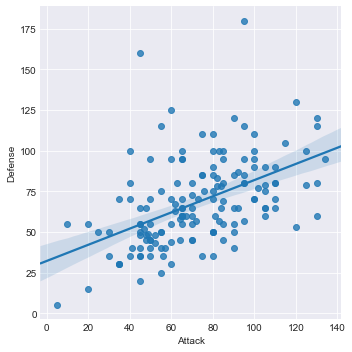

In [6]:
# Fit regression between Attack and Defense points
sns.lmplot(x='Attack', y='Defense', data=df)

In [7]:
# Choose which columns to plot
[col for col in df.columns.values]

['Name',
 'Type 1',
 'Type 2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Stage',
 'Legendary']

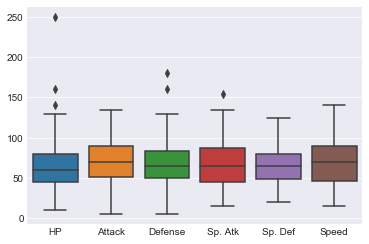

In [8]:
# Subset df by combat stats
stats_df = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def' ,'Speed',]]

# Create box-plots to vosualize Pokemon combat stats
sns.boxplot(data=stats_df)

In [9]:
# Define a Pokemon-themed color palette
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8']  # Dragon

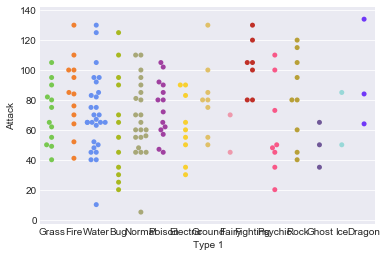

In [10]:
sns.swarmplot(x='Type 1', y='Attack', data=df,
              palette=pkmn_type_colors)

In [11]:
# Collapse stats columns into rows
melted_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
melted_df = pd.melt(melted_df, id_vars=['Name', 'Type 1','Type 2'], var_name='Stat')
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [12]:
melted_df[melted_df['Name'] == 'Bulbasaur'].head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
151,Bulbasaur,Grass,Poison,Attack,49
302,Bulbasaur,Grass,Poison,Defense,49
453,Bulbasaur,Grass,Poison,Sp. Atk,65
604,Bulbasaur,Grass,Poison,Sp. Def,65


In [13]:
print(df.shape)
print(melted_df.shape)
print(melted_df.shape[0] / df.shape[0])  # Collapsed 6 columns so rowcount blew out by a factor of 6

(151, 12)
(906, 5)
6.0


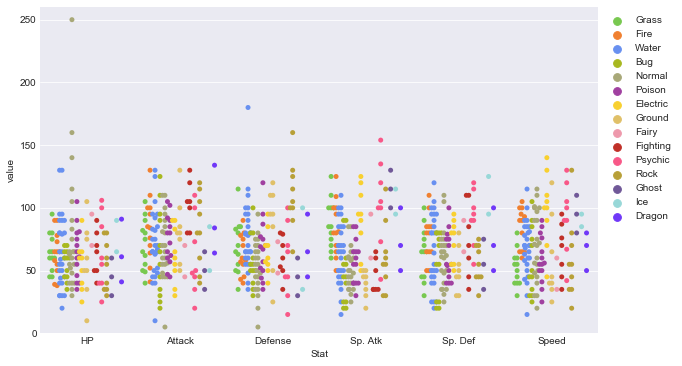

In [14]:
# Create a swarmplot with the new DataFrame
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Stat', y='value', data=melted_df,
              hue='Type 1',
              dodge=True,  # Separate points by hue (Pokemon Type)
              palette=pkmn_type_colors)
plt.ylim(0, 260)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

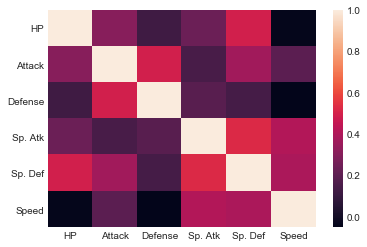

In [15]:
# What about correlation heatmaps?
corr = stats_df.corr()
sns.heatmap(corr)

Mean:  72.5496688742
Median:  70.0
StanDev:  26.5079492617
Skew:  0.14469715499053246
Kurtosis:  -0.3571247790751304
Dataset is not normal, p_val:  0.514441086603


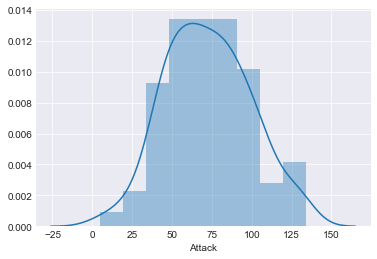

In [16]:
# Statistical Distributions
s = df.Attack
sns.distplot(s)

# Some basic metrics
print('Mean: ', np.mean(s))
print('Median: ', np.median(s))
print('StanDev: ', np.std(s))
print('Skew: ', stats.skew(s))
print('Kurtosis: ', stats.kurtosis(s))

# Test for normality
p_norm_test = stats.jarque_bera(s)[1]
if p_norm_test < 0.05:
    print('Dataset is normal, p_val: ', p_norm_test)
else:
    print('Dataset is not normal, p_val: ', p_norm_test)

Mean:  42.817580402
Median:  41.907590227
StanDev:  13.8741348862
Skew:  -0.024037421402410164
Kurtosis:  -0.23655635577575174
Dataset is not normal, p_val:  0.832511683645


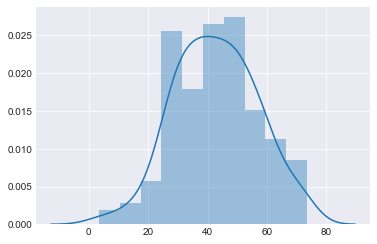

In [17]:
# Transform the dataset with Box-Cox
s_normal = stats.boxcox(s)[0]
sns.distplot(s_normal)
print('Mean: ', np.mean(s_normal))
print('Median: ', np.median(s_normal))
print('StanDev: ', np.std(s_normal))
print('Skew: ', stats.skew(s_normal))
print('Kurtosis: ', stats.kurtosis(s_normal))

# Test for normality on transformed data
p_norm_test = stats.jarque_bera(s_normal)[1]
if p_norm_test < 0.05:
    print('Dataset is normal, p_val: ', p_norm_test)
else:
    print('Dataset is not normal, p_val: ', p_norm_test)

Mean:  0.0471511644634
Median:  0.0816909041296
StanDev:  0.999290232584
Skew:  0.003713912237433384
Kurtosis:  -0.19491324925604747


0.43300442500065861

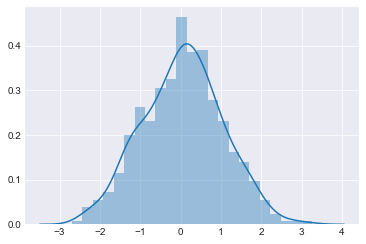

In [22]:
# What should a Gaussian distribution look like?
normal = np.random.randn(1000)
sns.distplot(normal)
print('Mean: ', np.mean(normal))
print('Median: ', np.median(normal))
print('StanDev: ', np.std(normal))
print('Skew: ', stats.skew(normal))
print('Kurtosis: ', stats.kurtosis(normal))
stats.normaltest(normal)[1]

,g,x
0,A,65.127158
1,B,67.401891
2,C,67.314815
3,D,67.141551
4,E,68.733866


In [43]:
len(df['Type 1'].unique())

15

In [44]:
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

def kde_plots(df, group, val):
    classes = len(df[group].unique())
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    pal = sns.cubehelix_palette(classes, rot=-.25, light=.7)
    g = sns.FacetGrid(df, row=group, hue=group, aspect=15, size=.5, palette=pal)
    g.map(sns.kdeplot, val, clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot, val, clip_on=False, color="w", lw=2, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)
    g.map(label, val)
    g.fig.subplots_adjust(hspace=-.25)
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

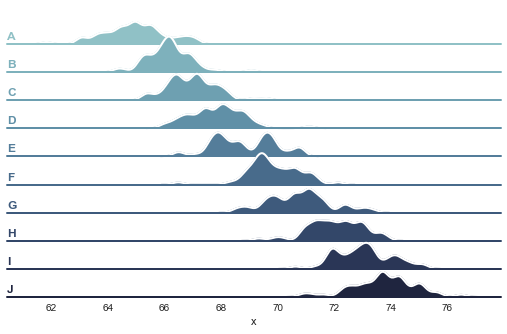

In [45]:
# Toy data
rs = np.random.RandomState(999)
x = rs.randn(500)
g = np.tile(list('ABCDEFGHIJ'), 50)
df_test = pd.DataFrame(dict(x=x, g=g))
m = df_test.g.map(ord)
df_test['x'] += m
df_test.head()

kde_plots(df_test, 'g', 'x')

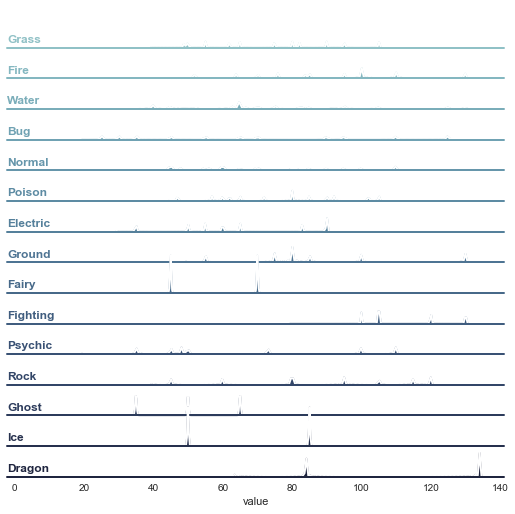

In [46]:
# Prepare data for KDE plots
stat = 'Attack'
kde_df = melted_df[melted_df['Stat'] == stat][['Type 1', 'value']]
kde_df.shape

kde_plots(kde_df, 'Type 1', 'value')